# Analyzing miniPAT halihut data from Arnault

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('PSAT 150616 transmitted data.csv')
df.index = pd.to_datetime(df['Date'])

## Plotting raw depth data as time series

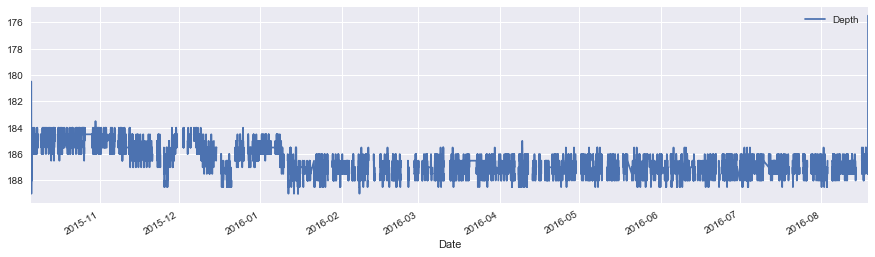

In [3]:
df.plot(y='Depth', figsize=(15,4)).invert_yaxis()

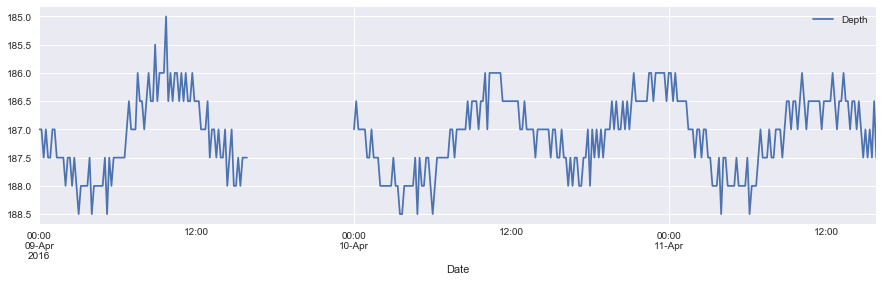

In [4]:
df['2016-4-9':'2016-4-11'].plot(y='Depth', figsize=(15,4)).invert_yaxis()

## Plotting raw depth data as 2-d plot

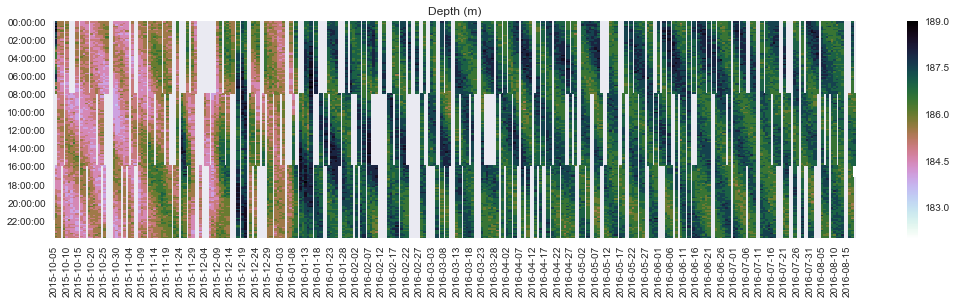

In [5]:
groups = df['Depth'].groupby(pd.TimeGrouper('D'))
days = pd.DataFrame()
for name, group in groups:
    ts = pd.DataFrame({str(name.date()):group.values}, index=[val.time() for val in group.index])
    days = pd.concat([days, ts], axis=1)
plt.figure(figsize=(18, 4))
ax = sns.heatmap(days, cmap='cubehelix_r', xticklabels=5, yticklabels=12, vmin=182)
plt.title('Depth (m)')

## Calculating and plotting depth change as 2-d plot

In [6]:
df['depth_change'] = abs(df['Depth'].diff())

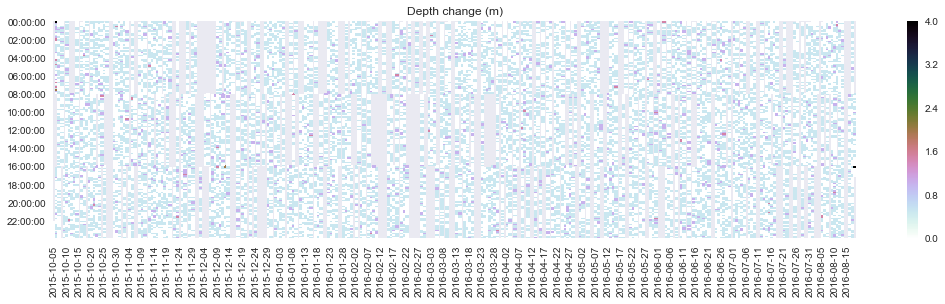

In [7]:
groups = df['depth_change'].groupby(pd.TimeGrouper('D'))
days = pd.DataFrame()
for name, group in groups:
    ts = pd.DataFrame({str(name.date()):group.values}, index=[val.time() for val in group.index])
    days = pd.concat([days, ts], axis=1)
plt.figure(figsize=(18, 4))
sns.heatmap(days, cmap='cubehelix_r', xticklabels=5, yticklabels=12, vmax=4)
plt.title('Depth change (m)')

# Daily accumulated depth change and histogram

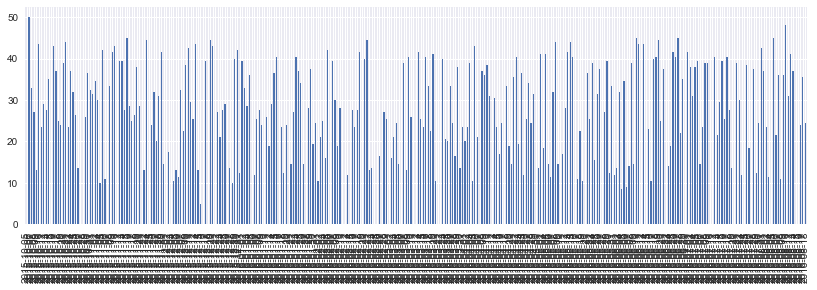

In [8]:
depth_change_sum = np.sum(days, axis=0)
depth_change_sum.plot(kind='bar', figsize=(14,4))

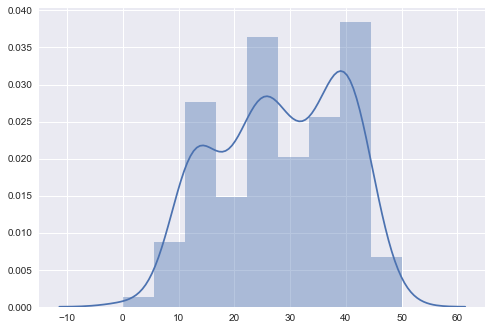

In [9]:
sns.distplot(depth_change_sum.dropna())

### Summary:
* Tidal pattern is visible but signal is very noisy. Tidal fitting is unlikely to work properly.
* Missing many 8-hour periods. If we go with 30min we will risk having 24-hour gaps but likely (hopefully) fewer gaps.
* This fish is mostly sedentary thus hard to distinguish between low/high activity levels (this tag could be entirely low-activity).